In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv(r'C:\Users\KANISHKA\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv')

In [91]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [92]:
##EDA

In [93]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [94]:
df[df.duplicated(keep=False)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [95]:
df.drop_duplicates(inplace=True)

In [96]:
## Data Visualization

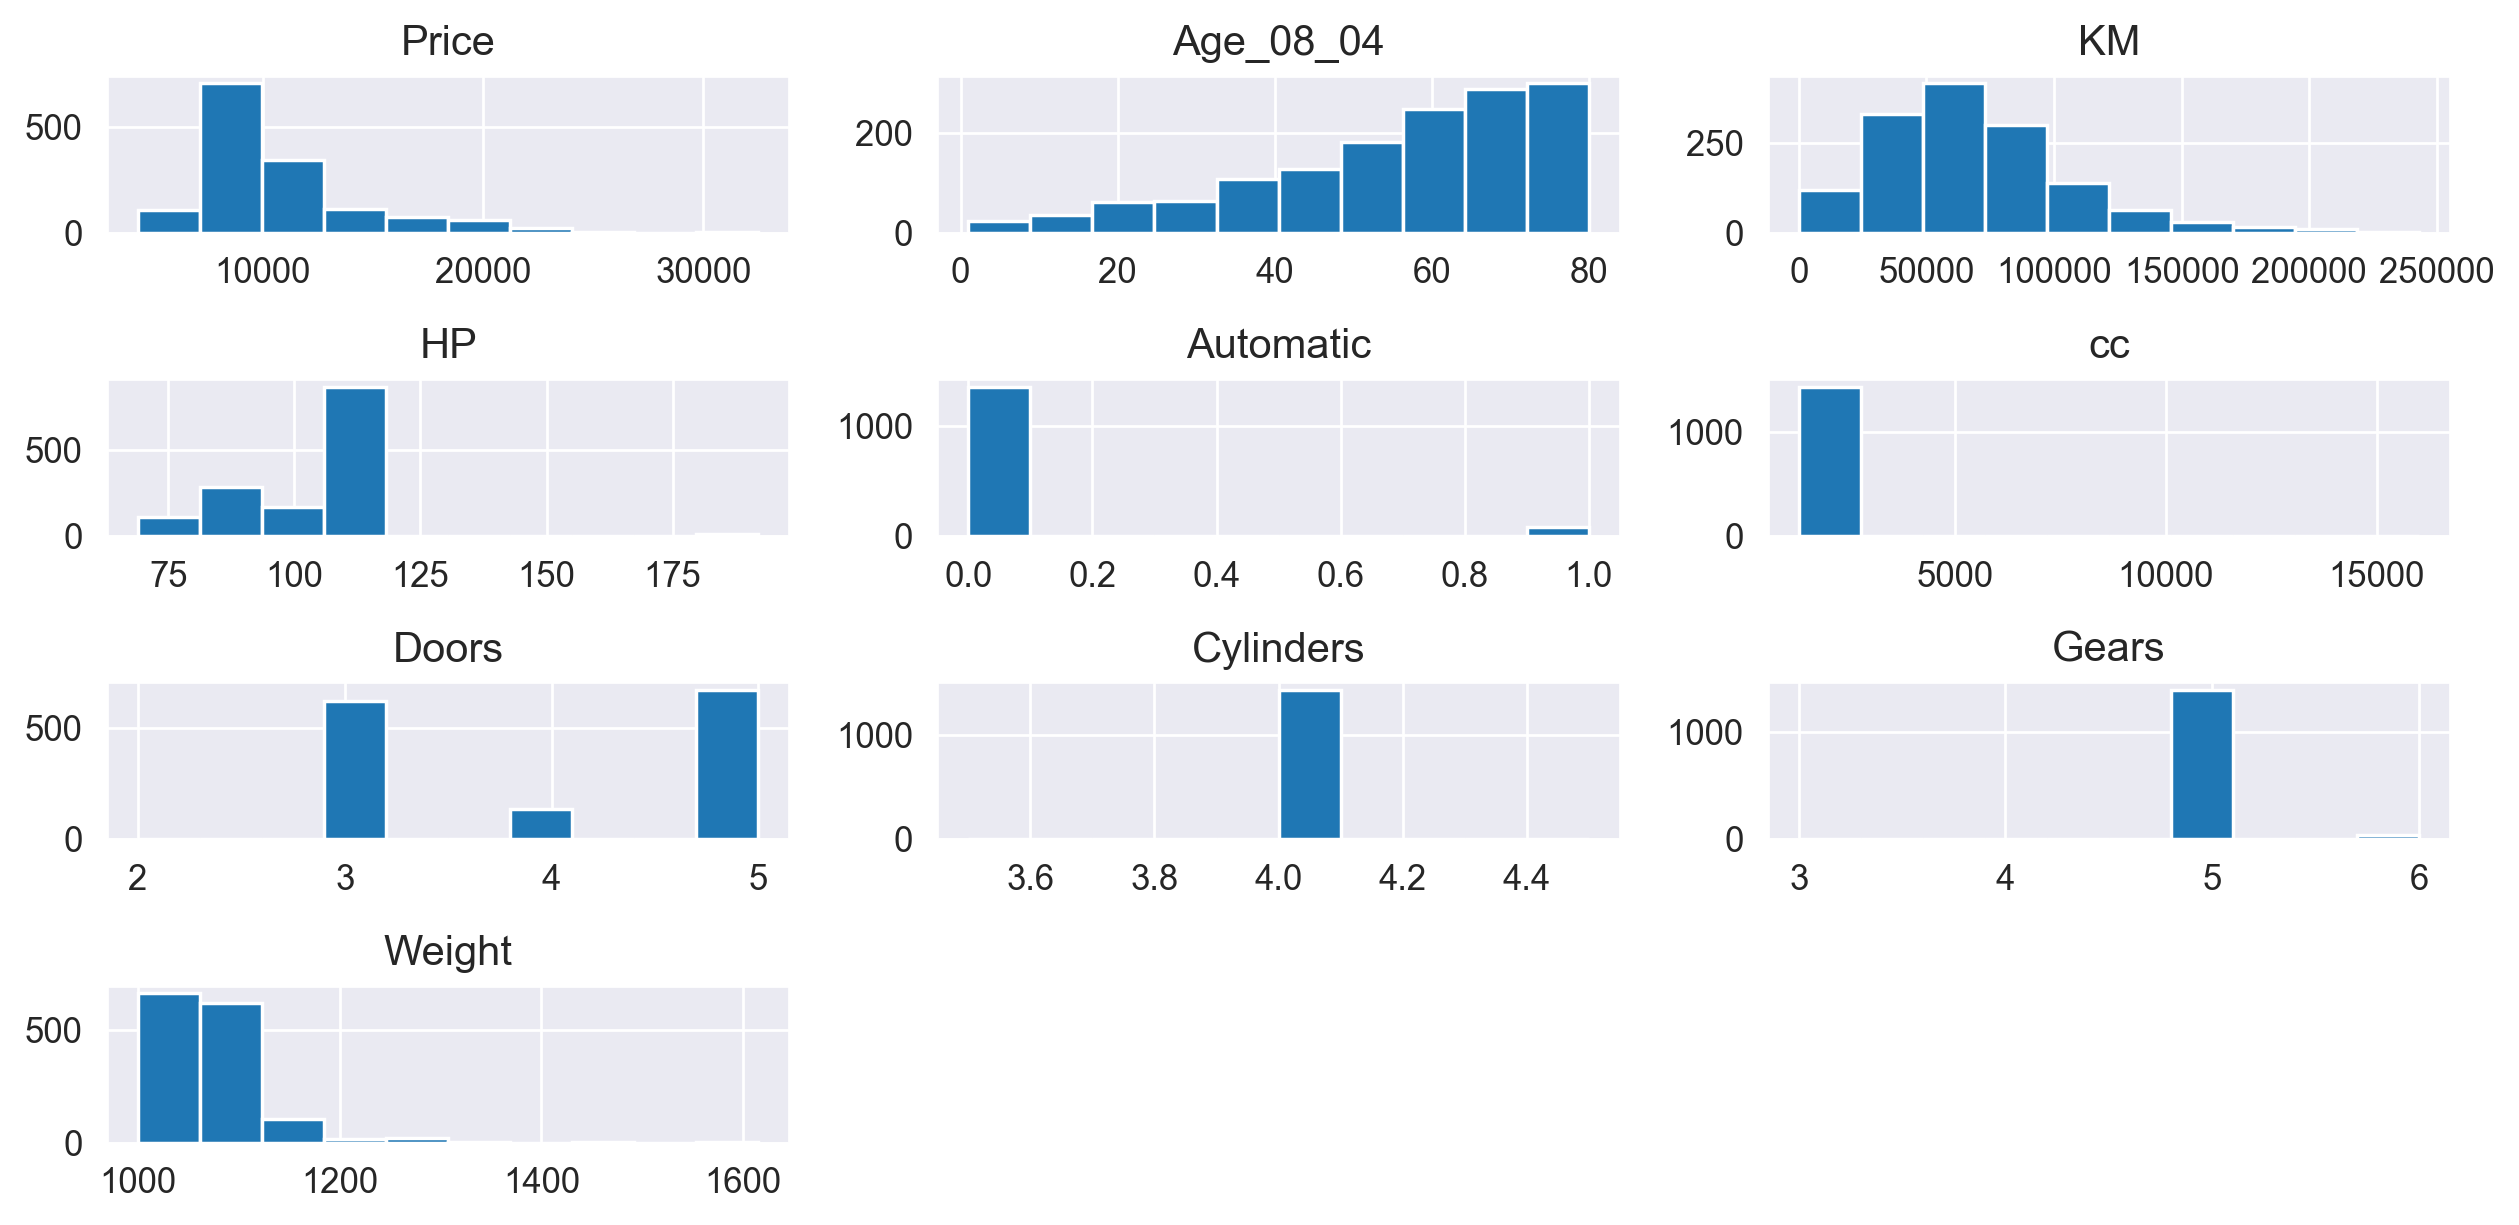

In [97]:
df.hist()
plt.tight_layout()

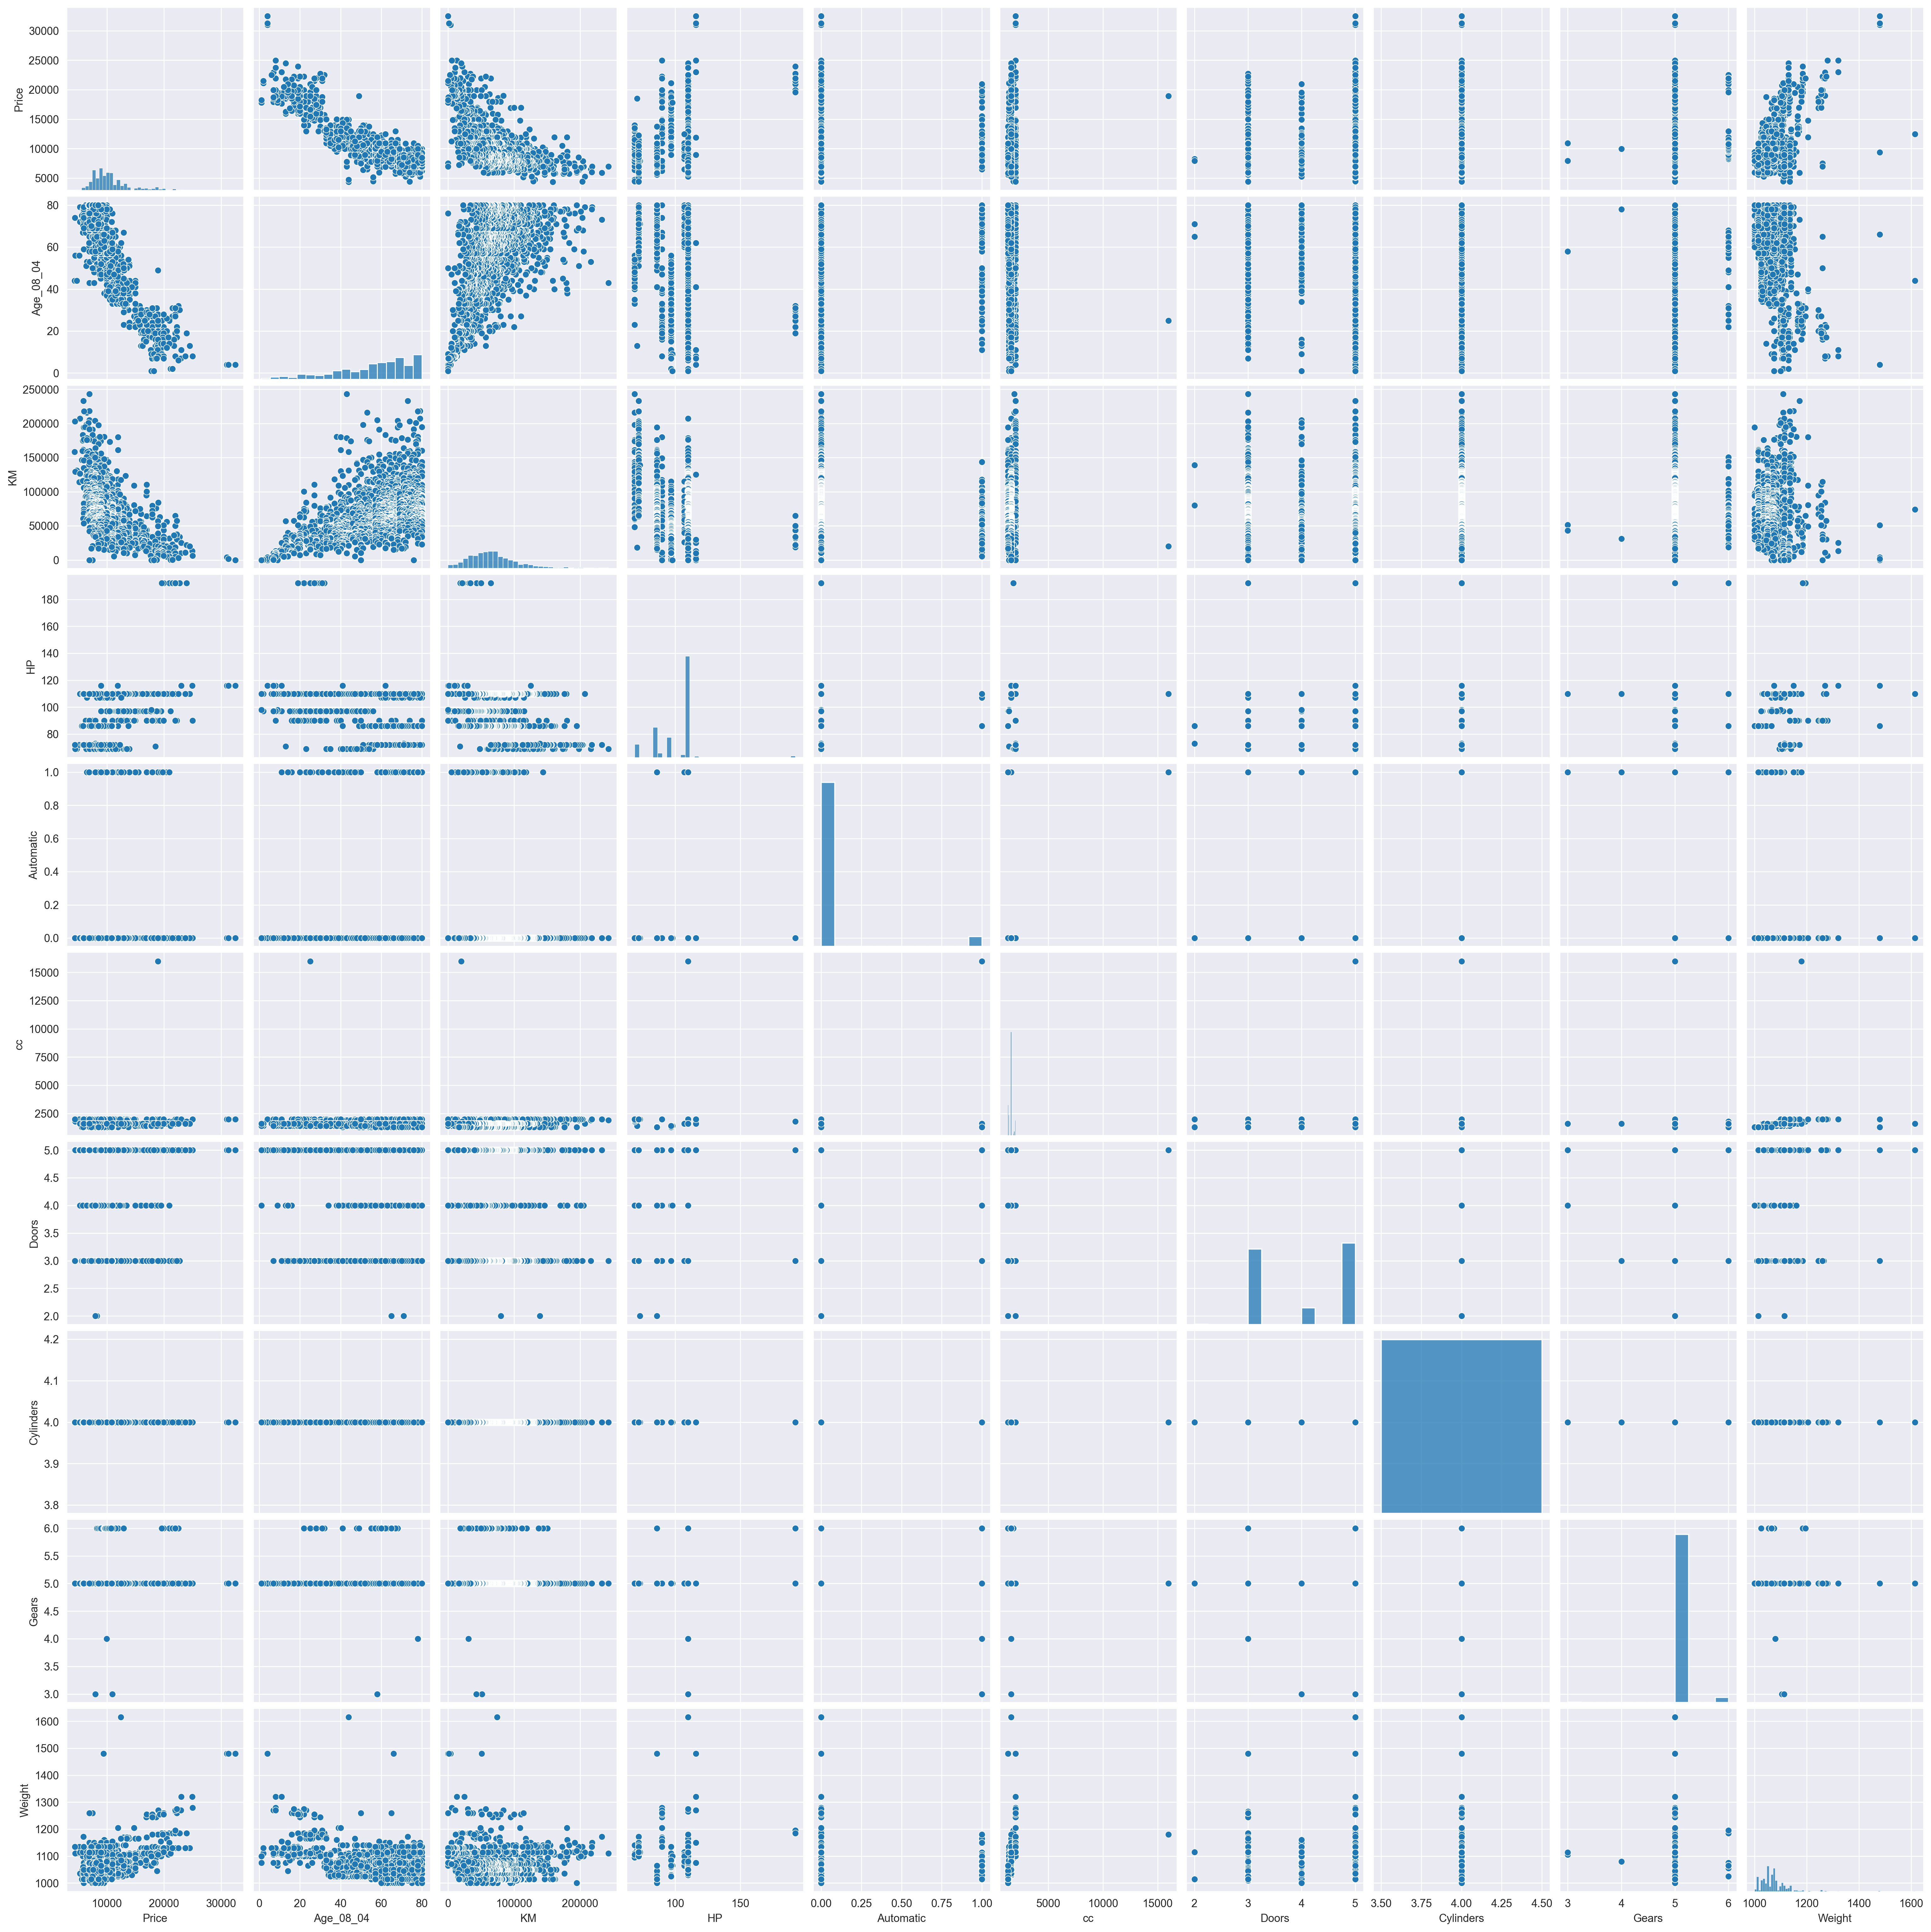

In [98]:
sns.pairplot(df)

In [99]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


<Axes: >

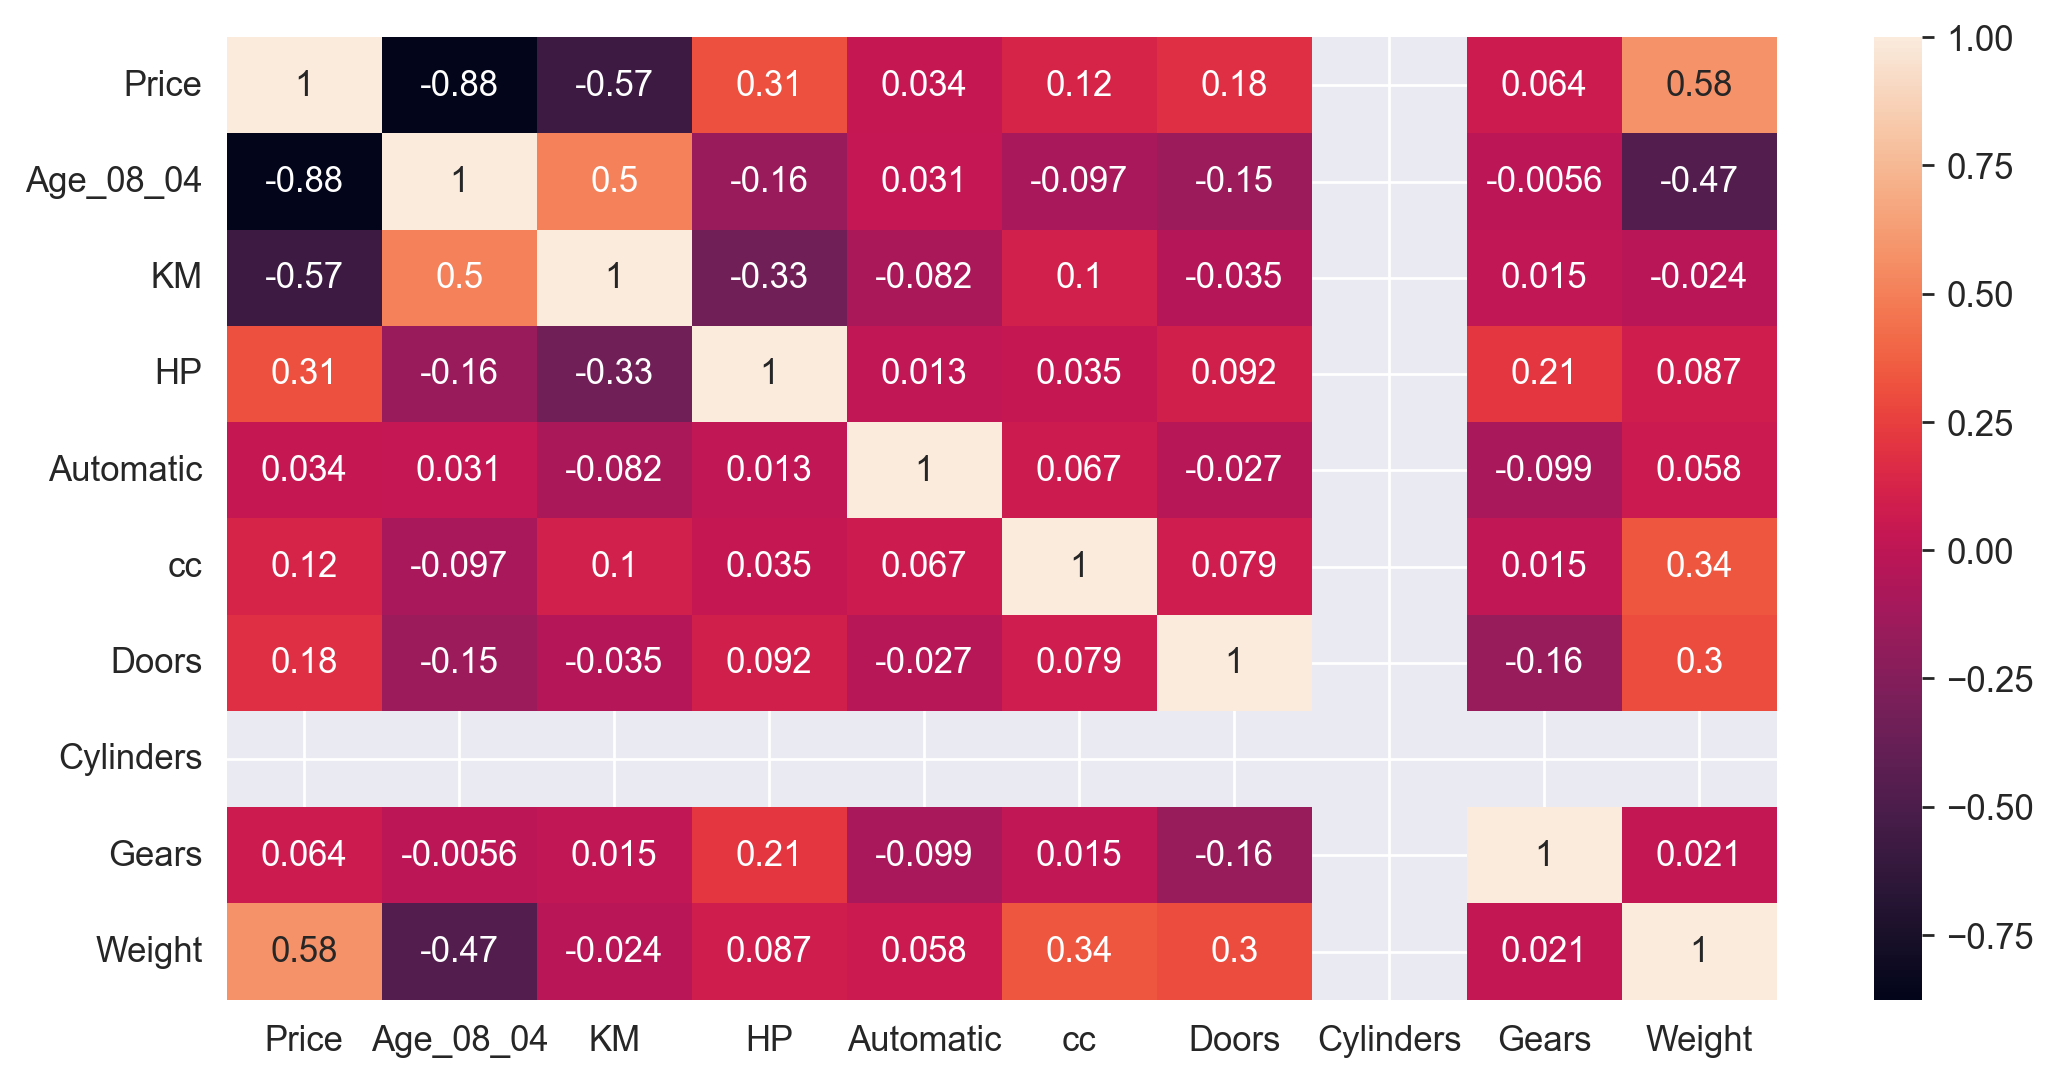

In [100]:
sns.heatmap(df.corr(), annot = True)

In [101]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [102]:
## from the above summary statistics we can see that there is presence of outliers in the column KM so we can tranform the 
# columns

In [103]:
df['KM'] = np.log(df['KM']) ##handling skewed data

In [104]:
## handling categorical data

In [105]:
df = pd.get_dummies(data=df, columns=['Fuel_Type'])

In [106]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,10.757605,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,11.197351,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,10.638520,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,10.778956,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,10.558414,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,9.930324,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,9.852194,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,9.741909,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,9.736015,86,0,1300,3,4,5,1015,0,0,1


In [107]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [108]:
## defining x and y
x = df.iloc[:,1:]
y = df['Price']

In [109]:
x.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [110]:
## scaling the data

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc = StandardScaler()

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.777268,-0.138160,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
1,-1.777268,0.272877,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
2,-1.723380,-0.249470,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
3,-1.615603,-0.118202,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
4,-1.400049,-0.324346,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.870688,-0.109493,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.701602,-0.911429,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-0.905299,-0.109493,-0.346726,0.367811
1431,0.863267,-0.984458,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1432,0.809379,-1.087543,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1433,0.755490,-1.093052,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,-0.109493,-0.346726,0.367811


In [113]:
## train test split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [116]:
## model building 

In [117]:
import statsmodels.api as sm

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
reg = LinearRegression()
model = reg.fit(xtrain,ytrain)
model

LinearRegression()

In [120]:
y_pred = model.predict(xtest)
y_pred

array([10928.11215377, 10224.04154181,  9230.76007381,  8954.433664  ,
        8132.66866256,  8471.33546254,  7313.05350514,  7964.25716728,
       11736.35075096, 12205.18662206,  9752.01745337,  9150.50839354,
       13071.21824006, 11905.62889639,  8552.79782954, 11298.5790342 ,
       12101.89210492, 17588.24546522,  9659.11666508, 11092.39661676,
       11260.13708838, 18217.35704206,  9379.24324514, 10078.88237036,
        7739.54487426, 15894.04402528,  6899.54366898,  8278.51463414,
       15625.27143885, 13584.60581016,  8273.5412223 ,  9402.15368327,
       10069.87734724, 10168.19165951,  9540.89620576,  8821.36850817,
        8825.90672188, 10033.60599802, 16410.16474424, 10496.65783518,
        9314.61484365,  9401.1027584 ,  9941.65329332,  8556.84302486,
       10281.17922709, 17780.60418508, 10064.08316011,  8756.10356367,
       10295.76678024, 12010.5389838 , 12566.52556783,  6073.0322331 ,
       15212.98264095, 16287.50511127,  6729.96898134,  7384.2891996 ,
      

In [121]:
# Regressor coefficients and intercept
print(f'Coefficient: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')

Coefficient: [-2.45483741e+03 -2.35802673e+02  2.55228963e+02  8.15802526e+01
 -2.38981632e+01 -1.11931924e+02 -2.84217094e-14  7.31047597e+01
  1.40001280e+03 -8.52074976e+01 -3.56722117e+02  3.69250791e+02]
Intercept: 10717.16892580551


In [122]:
## intrepretation
## Accumulated Kilometers on odometer is inversely related to the price of car
## Higher the horse power higher the price of car, 1% increase in horse power will increse price by 2.55 units
## If the car is automatic it will make the price of the car comparitively higher than the non-automatic one
## more the volume of cylinders lesser will be the price of car
## Another most important implication we can intrepret from the model is that cars which have fuel type as petrol commands
## higher price than the cng and diesal ones.


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [124]:
r2 = r2_score(ytest, y_pred)
r2

0.8021006714105802

In [125]:
## lasso

In [127]:
from sklearn.linear_model import Lasso

In [128]:
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(xtrain,ytrain)

In [130]:
y_pred_lasso = lasso.predict(xtest)

y_pred_lasso

array([10927.48372134, 10224.15640756,  9231.08446553,  8954.36774981,
        8132.65942959,  8471.42404547,  7313.3478926 ,  7964.18545218,
       11736.36707683, 12205.20663663,  9752.0103969 ,  9150.40240634,
       13071.34717304, 11905.64979956,  8552.9064556 , 11298.69315456,
       12102.0099696 , 17587.95471617,  9660.48178959, 11092.41350738,
       11260.52584632, 18217.11760753,  9379.35624102, 10078.89282903,
        7739.74679793, 15893.87430379,  6899.7438525 ,  8278.76573591,
       15625.01284988, 13584.62148922,  8273.4688816 ,  9402.66937152,
       10070.03042303, 10168.12860321,  9540.83416467,  8821.47540774,
        8826.14214163, 10033.54229873, 16409.90940151, 10496.5976682 ,
        9314.78402024,  9401.03693729,  9941.02215673,  8556.77235222,
       10281.29563785, 17780.3223857 , 10063.56569744,  8755.50058098,
       10296.08049763, 12011.02064386, 12566.64700758,  6073.01225072,
       15212.71889609, 16286.92733008,  6729.94878525,  7384.88128676,
      

In [137]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred_lasso))
rmse

1540.7223377901762

In [138]:
## ridge

In [139]:
from sklearn.linear_model import Ridge

In [141]:
ridge = Ridge(alpha=0.1)

model_ridge = ridge.fit(xtrain,ytrain)

In [143]:
y_pred_ridge = ridge.predict(xtest)

y_pred_ridge

array([10928.00429746, 10224.13700445,  9230.91981843,  8954.62742983,
        8132.71723205,  8471.31337526,  7313.41375674,  7964.48313246,
       11736.19434525, 12205.04853131,  9752.02130932,  9150.60659508,
       13071.12803258, 11905.59472506,  8553.07415365, 11298.53850952,
       12101.79119087, 17587.57039857,  9659.3409353 , 11092.41567222,
       11260.23444732, 18216.84549473,  9379.47588355, 10078.91677317,
        7739.59906915, 15893.66800124,  6899.73850359,  8278.71962508,
       15624.70279068, 13584.49509854,  8273.67029137,  9402.52252209,
       10069.99189487, 10168.19444475,  9541.08648128,  8821.51853737,
        8826.16400122, 10033.61834258, 16409.52240592, 10496.68431811,
        9314.50181014,  9401.1920902 ,  9941.68706337,  8556.96317878,
       10281.31594839, 17779.91830322, 10064.12225322,  8756.34821113,
       10296.03235097, 12010.85651987, 12566.43993422,  6073.19469392,
       15212.32976745, 16287.00538952,  6729.96535562,  7384.77566034,
      

In [146]:
mse = mean_squared_error(ytest,y_pred_ridge)
mse

2373835.2604493066

In [148]:
rmse = np.sqrt(mse)
rmse

1540.7255629894983